In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Veri_Seti3_201701_In = pd.read_csv('./Dataset 3/Veri_Seti3_201701_In.csv')

In [3]:
pd.DataFrame(Veri_Seti3_201701_In, index = [0,1,2,3,4])

,CALLER_ID,TIMESTAMP,ID,CITY_ID
0,1100144895,02-01-2017 12:52,568,7
1,1100144895,02-01-2017 20:40,568,7
2,1100144895,02-01-2017 21:41,568,7
3,1100144895,03-01-2017 14:57,828,7
4,1100144895,05-01-2017 10:01,568,7


In [4]:
JanuaryIn = np.asarray(Veri_Seti3_201701_In)

In [5]:
length, width = JanuaryIn.shape

In [34]:
print ('there are {} calls recorded in this dataset'.format(length))

there are 998625 calls recorded in this dataset


In [8]:
timestamp = []
for i in range(length):
    timestamp.append(JanuaryIn[i,1].split())

In [9]:
timestamp = np.asarray(timestamp)

In [10]:
time = timestamp[:,1]
hours = []
for i in time:
    hours.append(i[0]+i[1])

hours = np.asarray(hours)
hours = hours.astype(int)

In [11]:
callerID = JanuaryIn[:,0]

In [12]:
callerID = callerID.astype(str)

In [13]:
prefix = []
for i in callerID:
    prefix.append(i[0])

prefix = np.asarray(prefix)
prefix = prefix.astype(int)

In [14]:
unique, counts = np.unique(prefix, return_counts=True)
print ('there are {} refugee calls in this dataset'.format(counts[1]))

there are 758728 refugee calls in this dataset


In [15]:
cityID = JanuaryIn[:,3]

In [16]:
to_analyse = []
for i in range(len(callerID)):
    if prefix[i] == 2:
        if callerID[i] not in to_analyse:
                to_analyse.append(callerID[i])

In [17]:
to_analyse = np.asarray(to_analyse)

In [18]:
assert np.unique(to_analyse).shape == to_analyse.shape

In [28]:
evening_location = []
for i in to_analyse:
    location = np.where(callerID == i)
    location = np.asarray(location)
    location = location.reshape(-1)
    cities = []
    for j in location:
        if hours[j] >= 18 or hours[j] <= 7:
            cities.append(cityID[j])
    evening_location.append(i)
    evening_location.append(cities)

In [29]:
to_plot = []
for i in range(len(evening_location)):
    if i%2 == 1:
        unique, counts = np.unique(evening_location[i], return_counts=True)
        if len(unique) > 1:
            to_plot.append(evening_location[i-1])
            to_plot.append(evening_location[i])

In [33]:
print ('there are {} callers out ot 50,000 refugees who moved cities'.format(len(evening_location)))

there are 23484 callers out ot 50,000 refugees who moved cities


1


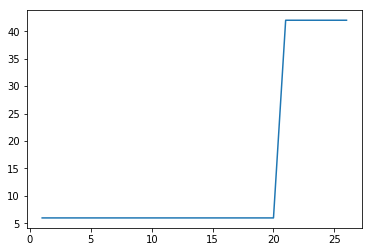

3


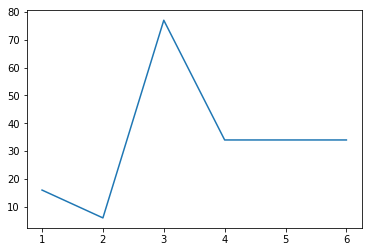

5


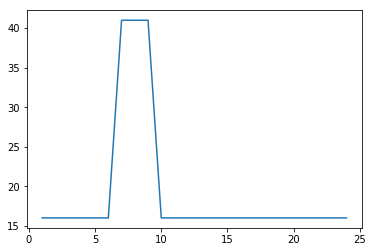

7


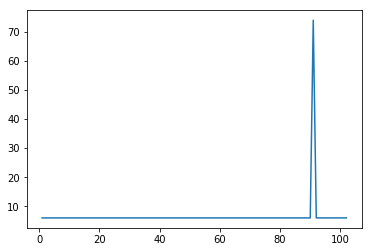

9


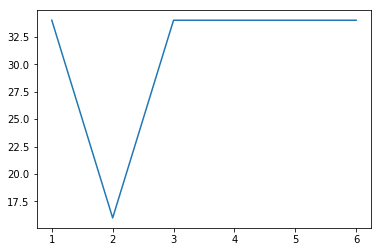

11


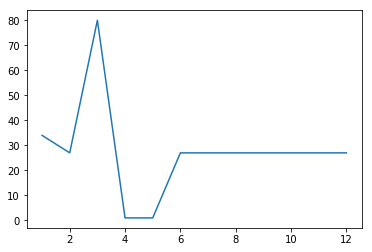

13


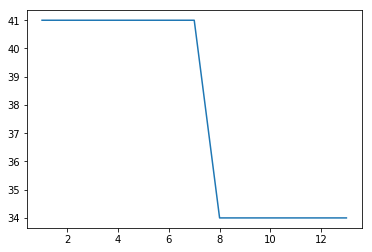

15


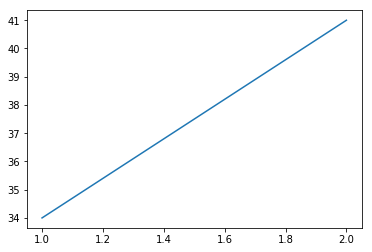

17


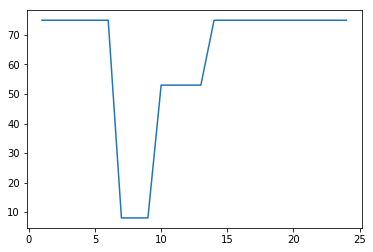

19


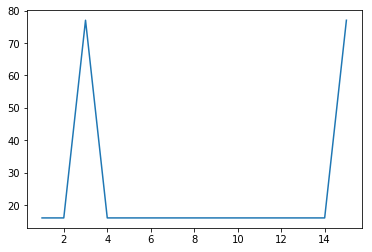

21


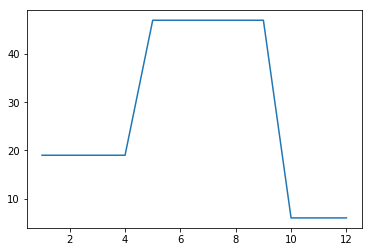

23


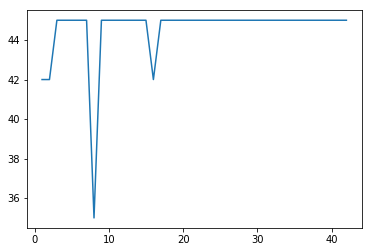

25


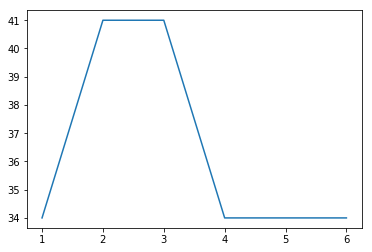

27


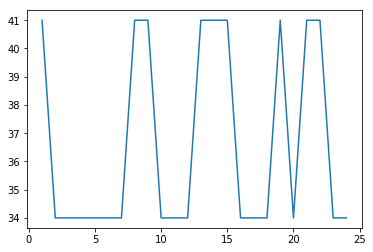

29


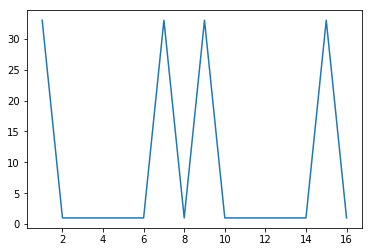

31


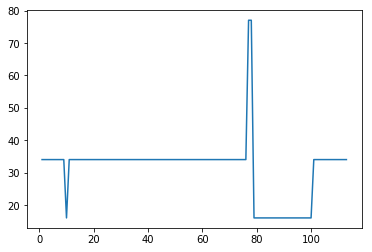

33


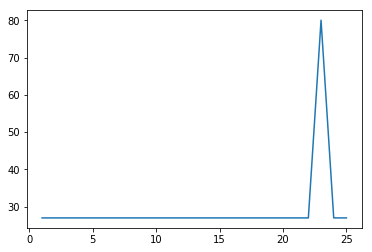

35


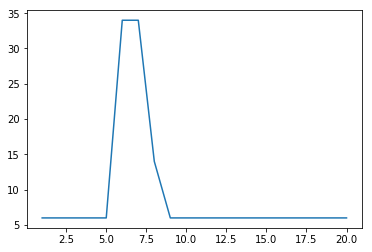

37


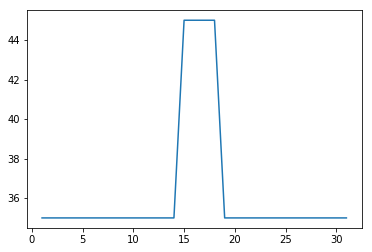

39


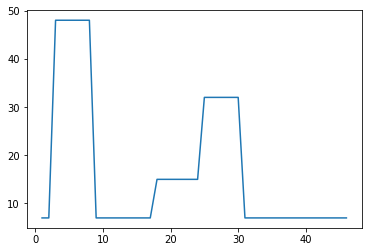

41


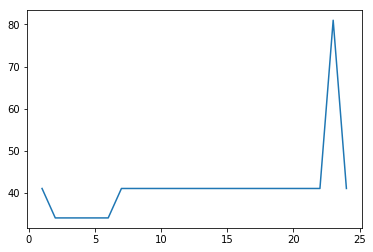

43


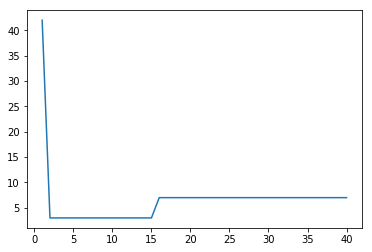

45


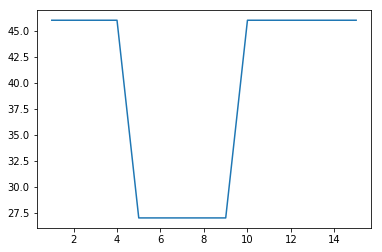

47


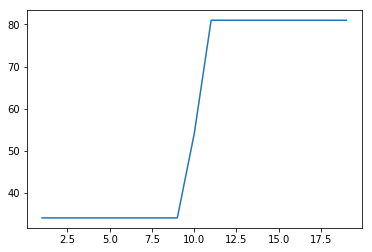

49


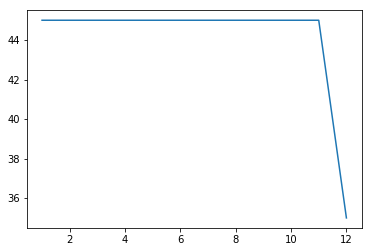

In [31]:
for i in range(0,50):
    if i%2 == 1:
        fig=plt.figure()
        index_show = i
        print(i)
        plt.plot(np.linspace(1,len(to_plot[i]),len(to_plot[i])), to_plot[i])
    
        plt.show()